94
653
79.19
31
1
10


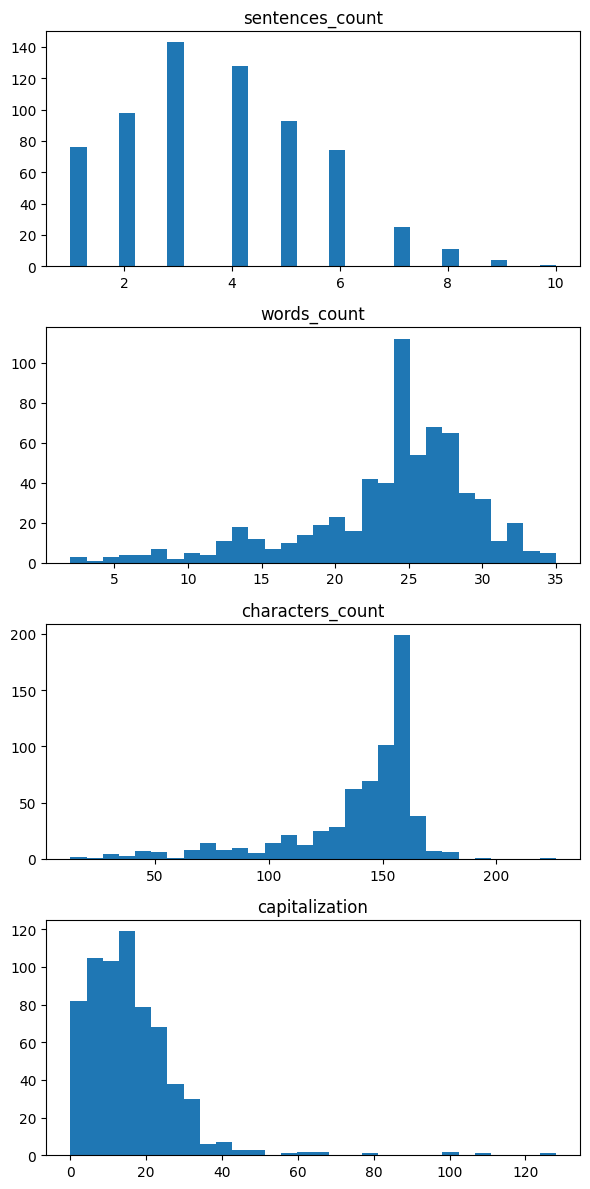


Correlation with target_encoded:
sentences_count     0.328902
words_count         0.286576
characters_count    0.387922
capitalization      0.356971
target_encoded      1.000000
Name: target_encoded, dtype: float64
characters_count (correlation = 0.3879)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('spam.csv', encoding='latin1')


# Create spamonly and count duplicates
spamonly = df[df['v1'] == 'spam'].copy()
spamonly_dup_count = spamonly.duplicated().sum()

print(spamonly_dup_count)

# spamonly without duplicates
spamonly_nodup = spamonly.drop_duplicates().reset_index(drop=True)
print(len(spamonly_nodup))


# Full dataset without duplicates
df_nodup = df.drop_duplicates().reset_index(drop=True)


# Average characters_count in duplicate-free full dataset
df_nodup['characters_count'] = df_nodup['v2'].astype(str).apply(len)
avg_len = round(df_nodup['characters_count'].mean(), 2)
print(avg_len)


# Maximum sentences_count in duplicate-free full dataset
def count_sentences(text):
    parts = re.split(r'[.!?]+', str(text))
    return sum(1 for p in parts if p.strip())

df_nodup['sentences_count'] = df_nodup['v2'].apply(count_sentences)
max_sentences = df_nodup['sentences_count'].max()
print(max_sentences)


# Minimum words_count in duplicate-free full dataset
df_nodup['words_count'] = df_nodup['v2'].astype(str).apply(
    lambda x: len(x.split())
)
min_words = df_nodup['words_count'].min()
print(min_words)

# Highest number of capital letters in first five SMS
def count_caps(text):
    return sum(1 for ch in str(text) if ch.isupper())

first5 = df_nodup.head(5).copy()
first5['capitalization'] = first5['v2'].apply(count_caps)
max_caps_first5 = first5['capitalization'].max()
print(max_caps_first5)


# Histograms for spam SMS (duplicate-free)
spam = df_nodup[df_nodup['v1'] == 'spam'].copy()

spam['sentences_count'] = spam['v2'].apply(count_sentences)
spam['words_count'] = spam['v2'].astype(str).apply(lambda x: len(x.split()))
spam['characters_count'] = spam['v2'].astype(str).apply(len)
spam['capitalization'] = spam['v2'].apply(count_caps)

fig, axs = plt.subplots(4, 1, figsize=(6, 12))
feature_list = ['sentences_count', 'words_count', 'characters_count', 'capitalization']

for ax, col in zip(axs, feature_list):
    ax.hist(spam[col].values, bins=30)
    ax.set_title(col)

plt.tight_layout()
plt.show()


# Correlation with target_encoded in duplicate-free full dataset
df_nodup['capitalization'] = df_nodup['v2'].apply(count_caps)

le = LabelEncoder()
df_nodup['target_encoded'] = le.fit_transform(df_nodup['v1'])  # ham/spam -> 0/1

corr_series = df_nodup[
    ['sentences_count', 'words_count', 'characters_count',
     'capitalization', 'target_encoded']
].corr()['target_encoded']

print("\nCorrelation with target_encoded:")
print(corr_series)

corr_no_self = corr_series.drop('target_encoded')
highest_corr_var = corr_no_self.idxmax()
highest_corr_value = corr_no_self.max()

print(
    f"{highest_corr_var} (correlation = {highest_corr_value:.4f})"
)
